**Name:** David Andrejsin  
**Course:** Advanced Big Data and Data Mining (MSCS-634-M40)  
**Assignment:** Lab 2: Classification Using KNN and RNN Algorithms

In [11]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

# Load the wine dataset
wine = load_wine()

# Convert the dataset into a DataFrame for easier exploration
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

# Display the first few rows of the dataset
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [12]:
# Display basic statistics of the dataset
display(df.describe())

# Check the distribution of the target variable (class labels)
display(df['target'].value_counts())

# Check for missing values
display(df.isnull().sum())


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


,count
target,
1,71
0,59
2,48


,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


In [13]:
# Split the dataset into 80% training and 20% testing sets
X = df.drop('target', axis=1)  # Features
y = df['target']               # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print(f'Training features shape: {X_train.shape}')
print(f'Test features shape: {X_test.shape}')


Training features shape: (142, 13)
Test features shape: (36, 13)


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = [1, 5, 11, 15, 21]

# Create a dictionary to store accuracy results
accuracy_results = {}

for k in k_values:
    # Initialize KNN classifier with current k
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model on the training data
    knn.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = knn.predict(X_test)

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)

    # Store the accuracy in dictionary
    accuracy_results[k] = acc

    # Print the result
    print(f"k = {k} --> Accuracy: {acc:.4f}")


k = 1 --> Accuracy: 0.7778
k = 5 --> Accuracy: 0.7222
k = 11 --> Accuracy: 0.7500
k = 15 --> Accuracy: 0.7500
k = 21 --> Accuracy: 0.7778


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Fit scaler on training data only
scaler = StandardScaler()

# Fit on training data, transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define k values to test
k_values = [1, 5, 11, 15, 21]

# Dictionary to store accuracy results
accuracy_results_scaled = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracy_results_scaled[k] = acc
    print(f"k = {k} --> Accuracy (scaled): {acc:.4f}")


k = 1 --> Accuracy (scaled): 0.9444
k = 5 --> Accuracy (scaled): 0.9444
k = 11 --> Accuracy (scaled): 0.9444
k = 15 --> Accuracy (scaled): 0.9722
k = 21 --> Accuracy (scaled): 0.9444
Unscaled Results: {1: 0.7777777777777778, 5: 0.7222222222222222, 11: 0.75, 15: 0.75, 21: 0.7777777777777778}
Scaled Results: {1: 0.9444444444444444, 5: 0.9444444444444444, 11: 0.9444444444444444, 15: 0.9722222222222222, 21: 0.9444444444444444}


In [23]:
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define radius values for unscaled data
radius_values_unscaled = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]

# Store results
accuracy_results_rnn_unscaled = {}

for radius in radius_values_unscaled:
    try:
        # Initialize model
        rnn = RadiusNeighborsClassifier(radius=radius)
        rnn.fit(X_train, y_train)
        y_pred = rnn.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracy_results_rnn_unscaled[radius] = acc
        print(f"Radius = {radius} --> Accuracy (unscaled): {acc:.4f}")

    except ValueError as e:
        print(f"Radius = {radius} --> Error: {e}")


Radius = 50 --> Error: No neighbors found for test samples array([20]), you can try using larger radius, giving a label for outliers, or considering removing them from your dataset.
Radius = 100 --> Error: No neighbors found for test samples array([20]), you can try using larger radius, giving a label for outliers, or considering removing them from your dataset.
Radius = 150 --> Accuracy (unscaled): 0.8056
Radius = 200 --> Accuracy (unscaled): 0.7222
Radius = 250 --> Accuracy (unscaled): 0.7778
Radius = 300 --> Accuracy (unscaled): 0.8056
Radius = 350 --> Accuracy (unscaled): 0.7500
Radius = 400 --> Accuracy (unscaled): 0.7222
Radius = 450 --> Accuracy (unscaled): 0.7222
Radius = 500 --> Accuracy (unscaled): 0.7222
Radius = 550 --> Accuracy (unscaled): 0.7222
Radius = 600 --> Accuracy (unscaled): 0.7222


In [27]:
from sklearn.preprocessing import StandardScaler

# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define radius values for scaled data (much smaller)
radius_values_scaled = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

# Store results
accuracy_results_rnn_scaled = {}

for radius in radius_values_scaled:
    try:
        # Initialize model
        rnn = RadiusNeighborsClassifier(radius=radius)
        rnn.fit(X_train_scaled, y_train)
        y_pred = rnn.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        accuracy_results_rnn_scaled[radius] = acc
        print(f"Radius = {radius} --> Accuracy (scaled): {acc:.4f}")

    except ValueError as e:
        print(f"Radius = {radius} --> Error: {e}")


Radius = 2.0 --> Error: No neighbors found for test samples array([ 1,  6, 13, 21, 22, 23, 27]), you can try using larger radius, giving a label for outliers, or considering removing them from your dataset.
Radius = 3.0 --> Accuracy (scaled): 0.9444
Radius = 4.0 --> Accuracy (scaled): 1.0000
Radius = 5.0 --> Accuracy (scaled): 0.9167
Radius = 6.0 --> Accuracy (scaled): 0.5833
Radius = 7.0 --> Accuracy (scaled): 0.4167
Radius = 8.0 --> Accuracy (scaled): 0.3889
Radius = 9.0 --> Accuracy (scaled): 0.3889
Radius = 10.0 --> Accuracy (scaled): 0.3889


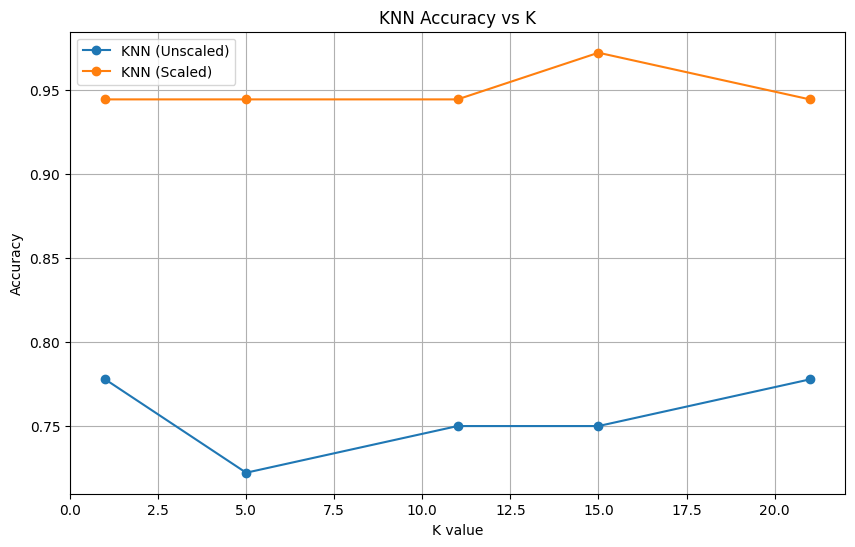

In [28]:
import matplotlib.pyplot as plt

# Plot KNN accuracy for both unscaled and scaled data
plt.figure(figsize=(10, 6))

# Unscaled (if you stored earlier unscaled KNN results in accuracy_results)
plt.plot(list(accuracy_results.keys()), list(accuracy_results.values()), marker='o', label='KNN (Unscaled)')

# Scaled
plt.plot(list(accuracy_results_scaled.keys()), list(accuracy_results_scaled.values()), marker='o', label='KNN (Scaled)')

plt.title('KNN Accuracy vs K')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

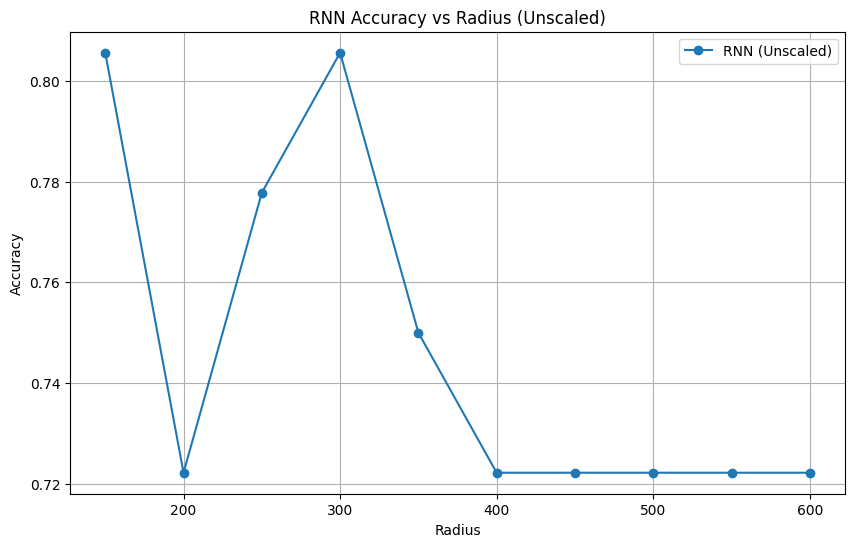

In [31]:
plt.figure(figsize=(10, 6))

plt.plot(list(accuracy_results_rnn_unscaled.keys()), list(accuracy_results_rnn_unscaled.values()), marker='o', label='RNN (Unscaled)')

plt.title('RNN Accuracy vs Radius (Unscaled)')
plt.xlabel('Radius')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


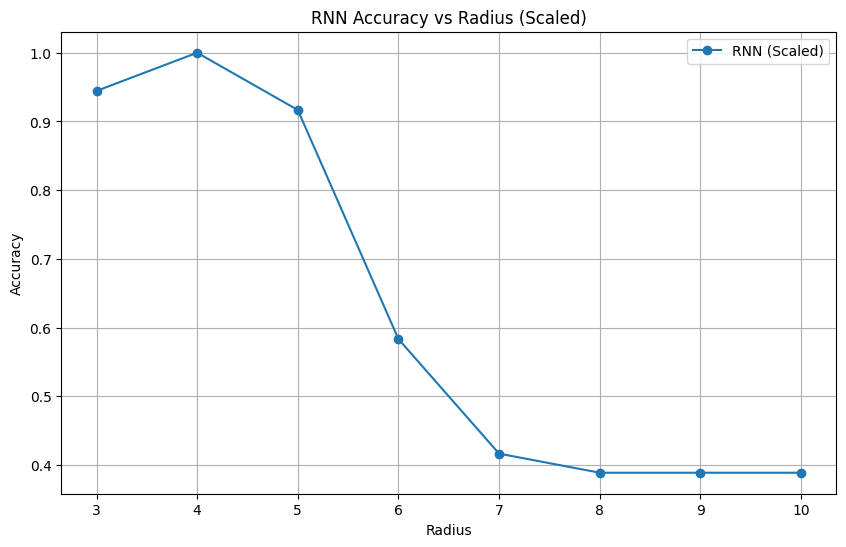

In [30]:
plt.figure(figsize=(10, 6))

plt.plot(list(accuracy_results_rnn_scaled.keys()), list(accuracy_results_rnn_scaled.values()), marker='o', label='RNN (Scaled)')

plt.title('RNN Accuracy vs Radius (Scaled)')
plt.xlabel('Radius')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
